# Import Libraries

In [1]:
#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt    
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import classification_report 

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,SelectKBest,RFE,RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#from lightgbm import LGBMClassifier

#import classification evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score

In [2]:
def load_data():
    meddf = pd.read_csv("medicalfraud.csv")
    return meddf
#load_data().tail(5)

In [3]:
#dealing with missing values in column "Default", which is also the label data
meddf=load_data()

#meddf.isnull().sum()  --- No null data

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [5]:
meddf['FRAUD_LABEL'] = labelencoder.fit_transform(meddf['FRAUD_LABEL'])
meddf

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
0,100.000000,0,1,1,0,0,21,0,109.111328,71.316356,24.658738,40.935309,400.000000,120,37,30,35,400
1,100.588010,9,1,1,9,9,34,0,0.942975,48.316478,27.854219,24.471927,402.352042,285,55,35,46,402
2,100.402561,0,1,1,0,0,35,0,159.592229,53.969161,26.888177,37.658748,401.610244,156,64,21,32,402
3,100.000000,3,1,1,84,9,38,0,59.203803,43.843904,48.933583,19.248757,400.000000,253,27,35,46,400
4,100.000000,22,1,1,22,22,24,0,95.780922,38.195557,43.876891,40.236061,400.000000,206,47,49,46,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,146.540802,32,0,1,1282,99,144,1,240.145667,85.091294,59.004133,59.828409,586.163207,296,44,26,62,586
196,166.996236,31,1,1,565,99,144,1,283.382510,47.368773,34.592914,66.190017,667.984945,377,59,82,68,668
197,129.295911,16,0,3,58,1193,174,1,27.152371,74.000566,37.857469,55.689913,517.183644,157,40,48,56,517
198,117.001118,11,0,1,13,46,174,1,191.312658,66.191091,52.319587,37.414503,468.004471,189,54,28,43,468


In [6]:
#first performing basic analysis
def basicanalysis(meddf):
    print("Shape is:\n", meddf.shape, ":\n")
    print("Columns are:\n", meddf.columns, ":\n")
    print("Types are:\n", meddf.dtypes, ":\n")
    print("Skewness of columns:\n", meddf.skew(), ":\n")
    print("Statistical Analysis of Numerical Columns:\n", meddf.describe(), ":\n")
basicanalysis(load_data())

Shape is:
 (200, 18) :

Columns are:
 Index(['amount_paid_to_date', 'number_presc_to_date', 'max_presc_to_date',
       'max_presc_per_doctor', 'max_presc_per_hospital', 'max_presc_per_year',
       'id', 'FRAUD_LABEL', 'amount_paid_per_year', 'amount_paid_per_hospital',
       'amount_paid_per_doctor', 'amount_paid_to_prescription',
       'amount_paid_total', 'number_presc_per_year',
       'number_presc_per_hospital', 'number_presc_per_doctor',
       'number_presc_to_prescription', 'number_presc_total'],
      dtype='object') :

Types are:
 amount_paid_to_date             float64
number_presc_to_date              int64
max_presc_to_date                 int64
max_presc_per_doctor              int64
max_presc_per_hospital            int64
max_presc_per_year                int64
id                                int64
FRAUD_LABEL                        bool
amount_paid_per_year            float64
amount_paid_per_hospital        float64
amount_paid_per_doctor          float64
amount_pa

## Encoding Label Col

In [7]:
meddf.shape

(200, 18)

## Columns Analysis

None


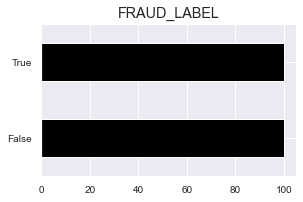

In [9]:
#string column analysis analysis
def stringcolanalysis(meddf):
    stringcols = meddf.select_dtypes(exclude=np.number)
    fig = plt.figure(figsize = (8,10))
    for i,col in enumerate(stringcols):
        fig.add_subplot(4,2,i+1)
        fig.savefig('Categorical.png')
        meddf[col].value_counts().plot(kind = 'barh', color='black' ,fontsize=10)
        plt.tight_layout()
        plt.title(col)
print (stringcolanalysis(load_data()))

In [10]:
#numerical analysis
#histograms and boxplots for all numerical columns
#scatter plots (seaborn heatmaps)
def numcolanalysis(meddf):
    #correlation  matrix
    corr = meddf.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
    );
    numcols = meddf.select_dtypes(include=np.number)
    
    for col in numcols:
        fig = plt.figure(figsize = (5,5))
        sb.boxplot(meddf[col], color='grey', linewidth=1)
        plt.tight_layout()
        plt.title(col)
        plt.savefig("Numerical.png")

        
#print (numcolanalysis(load_data()))

## Manual Split

In [11]:
def XY_split(meddf):
    #make a copy of the label column and store in y
    y = meddf['FRAUD_LABEL'].copy()
    
    #now delete the original
    X = meddf.drop('FRAUD_LABEL',axis=1)
    return X, y
#print (XY_split(meddf))

In [12]:
def train_test(meddf,split,random):
    X,y = XY_split(meddf)
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    
    return  trainX, testX, trainY, testY 
#checking the split
#print (train_test(meddf,0.25,2))

## Validation Metrics

In [13]:
def validationmetrics(model,testX,testY):
    predictions = model.predict(testX)
    print("\nPrediction Vector: \n", predictions)
    
    #Accuracy
    print("Accuracy: \n", accuracy_score(testY, predictions)*100)
    
    #Precision
    print("Precision of Fraud Happening: \n", precision_score(testY, predictions,pos_label=1,labels=[0,1])*100)
    
    #Recall
    print("Recall of Fraud Happening: \n", recall_score(testY, predictions,pos_label=1,labels=[0,1])*100)
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    print("AUC of Fraud Happening: \n",auc(fpr, tpr))
    
    #F-Score
    print("F-Score OF Fraud Happening:\n", f1_score(testY, predictions))
    
    #confusion Matrix
    
    print("Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    ns_probs = [0 for _ in range(len(testY))]
    ns_auc = roc_auc_score(testY, ns_probs)
    lr_auc = roc_auc_score(testY, predictions)
    ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testY, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()

## Random Forest Feature Selection (RFFS)

In [14]:
def RFFS(train_X, test_X, train_y, test_y ):
    clf  = RandomForestClassifier(n_estimators=100, random_state=9)
    print(clf)
    clf.fit(train_X, train_y)
    sfm=SelectFromModel(clf, threshold=0.10)
    sfm.fit(train_X, train_y)
    train_X_imp = sfm.transform(train_X)
    test_X_imp = sfm.transform(test_X)
    return train_X_imp, test_X_imp


## Random Forest Feature Selection (RFFS) for Cross Validation

In [15]:
def RFFS_CV(meddf):
    X,y= XY_split(meddf)
    clf  = RandomForestClassifier(n_estimators=100, random_state=9)
    #print(clf)
    clf.fit(X,y)
    sfm=SelectFromModel(clf, threshold=0.02)
    sfm.fit(X,y)
    X_new = sfm.transform(X)
    return X_new
    print(pd.Series(clf.feature_importances_, index=train_X.columns.values).sort_values(ascending=False)*100)
    #validationmetrics(clf,test_X,test_y)
    #return train_X_imp, test_X_imp
#print (RFFS_CV(meddf))

## Mutual Information Feature Selection (MIFS)

In [16]:
def MIFS(meddf):
    X,y=XY_split(meddf)
    sel_mutual = SelectKBest(mutual_info_classif, k=4)
    train_X_mutual = sel_mutual.fit_transform(X, y)
    
    
    return train_X_mutual
#MIFS(meddf)

## PCA

In [17]:
def PCAnalysis(meddf):
    X,y=XY_split(meddf)
    
    X=StandardScaler().fit_transform(X)
    pca=PCA(n_components=2)
    pca_new=pca.fit_transform(X)
    return pca_new
#PCAnalysis(meddf)


## Recursive Feature Elimination - RFE

In [18]:
def KNNRE(X, y, trees, random,split):
    clf = RandomForestClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
    
    #trainX, trainY, testX, testY= cross_valid(X, y,split,repeat,random)
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [19]:
def NBRFE(X, y, trees, random,split):
    clf = MultinomialNB()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = MultinomialNB()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [20]:
def LogRegRFE(X, y, random, split):
    clf = LogisticRegression(solver='lbfgs')
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = LogisticRegression(solver='liblinear',penalty='l2')
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [21]:
def MLPRFE(X, y, random, split):
    clf = MLPClassifier(hidden_layer_sizes=(100,100,100))
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = MLPClassifier(hidden_layer_sizes=(100,100,100))
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [22]:
def SVMRFE(X, y, random, split):
    #clf = LogisticRegression(solver='liblinear',penalty='l2')
    clf = SVC(kernel="linear")
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = SVC()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [23]:
def DTRFE(X, y, random, split):
    clf = DecisionTreeClassifier()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [24]:
def RFRFE(X, y, trees, random,split):
    clf = RandomForestClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [25]:
def XGBoostRFE(X, y, trees, random,split):
    clf = XGBClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = XGBClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [26]:
def AdaBoostRFE(X, y, trees, random,split):
    clf = AdaBoostClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = AdaBoostClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [27]:
def LGBMRFE(X, y, trees, random,split):
    clf = lgb.LGBMClassifier()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = lgb.LGBMClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [28]:
def GNBRFE(X, y, random,split):
    clf = GaussianNB()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = GaussianNB()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


# Algorithms 

In [29]:
def KNN(trainX, testX, trainY, testY):
    clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [30]:
def NB(trainX, testX, trainY, testY):
    clf = MultinomialNB()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [31]:
def LogReg( trainX, testX, trainY, testY):
    clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [32]:
def MLP( trainX, testX, trainY, testY):
    clf  = MLPClassifier(hidden_layer_sizes=(100,100,100))
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [33]:
def SVM(trainX, testX, trainY, testY):
    clf = SVC()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [34]:
def DecTree(trainX, testX, trainY, testY):
    clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [35]:
def RandomForest(trainX, testX, trainY, testY):
    clf  = RandomForestClassifier(n_estimators=1000, random_state=9)
    clf.fit(trainX,trainY)
    validationmetrics(clf,testX,testY)

In [36]:
def XGBoost(trainX, testX, trainY, testY):
    clf = XGBClassifier(n_estimators=1000, random_state=9)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [37]:
def AdaBoost(trainX, testX, trainY, testY):
    clf = AdaBoostClassifier(n_estimators=1000, random_state=9)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [38]:
def LGBM(trainX, testX, trainY, testY):
    clf = lgb.LGBMClassifier() 
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [39]:
def GNB(trainX, testX, trainY, testY):
    clf = GaussianNB() 
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

# Manual Split

# RFFS results with manual split

RandomForestClassifier(random_state=9)

Results for K-Neraest Neighbour without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


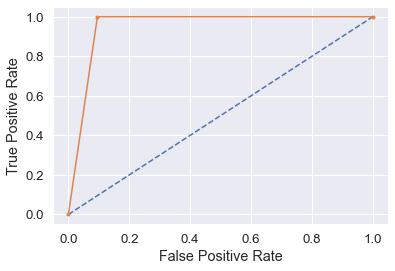

In [40]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for K-Neraest Neighbour without cross validation: :\n")
KNN(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Naive Bayes without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 80.0
Precision of Fraud Happening: 
 73.91304347826086
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.8045112781954888
F-Score OF Fraud Happening:
 0.8095238095238095
Confusion Matrix: 
 [[15  6]
 [ 2 17]]


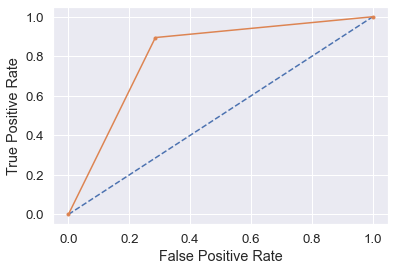

In [41]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for Naive Bayes without cross validation: :\n")
NB(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for logistic Regression without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 90.0
Precision of Fraud Happening: 
 82.6086956521739
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9047619047619048
F-Score OF Fraud Happening:
 0.9047619047619047
Confusion Matrix: 
 [[17  4]
 [ 0 19]]


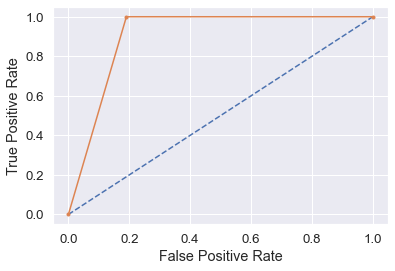

In [42]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for logistic Regression without cross validation: :\n")
LogReg (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for MLP without cross validation: :


Prediction Vector: 
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 0 1 0]
Accuracy: 
 70.0
Precision of Fraud Happening: 
 73.33333333333333
Recall of Fraud Happening: 
 57.89473684210527
AUC of Fraud Happening: 
 0.6942355889724311
F-Score OF Fraud Happening:
 0.6470588235294117
Confusion Matrix: 
 [[17  4]
 [ 8 11]]


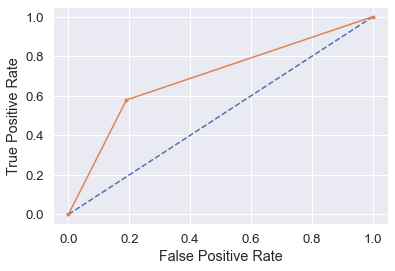

In [43]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for MLP without cross validation: :\n")
MLP (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for SVM without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 85.0
Precision of Fraud Happening: 
 76.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.8571428571428572
F-Score OF Fraud Happening:
 0.8636363636363636
Confusion Matrix: 
 [[15  6]
 [ 0 19]]


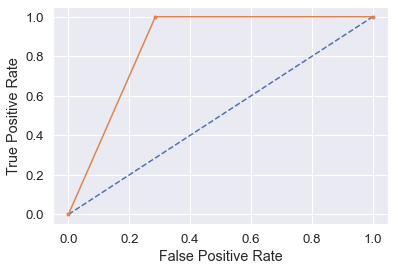

In [44]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for SVM without cross validation: :\n")
SVM(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Decision Tree without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


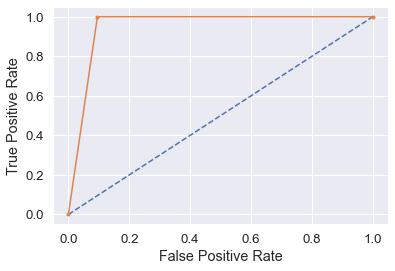

In [45]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )

print ("\nResults for Decision Tree without cross validation: :\n")
DecTree(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Randon Forest without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


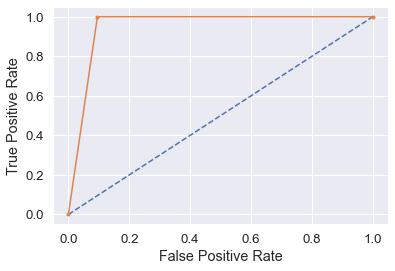

In [46]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for Randon Forest without cross validation: :\n")
RandomForest(train_X_imp, test_X_imp, train_y, test_y)


RandomForestClassifier(random_state=9)

Results for XGBoost without cross validation: :



C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Prediction Vector: 
 [1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 95.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9761904761904762
F-Score OF Fraud Happening:
 0.9743589743589743
Confusion Matrix: 
 [[20  1]
 [ 0 19]]


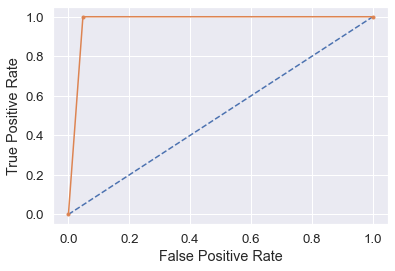

In [47]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for XGBoost without cross validation: :\n")
XGBoost (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for AdaBoost without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


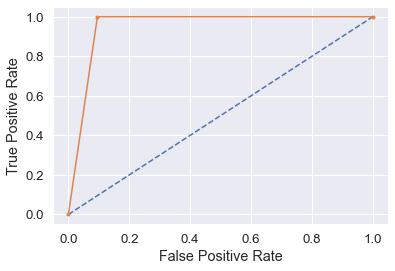

In [48]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for AdaBoost without cross validation: :\n")
AdaBoost (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for LGBM without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 86.36363636363636
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9285714285714286
F-Score OF Fraud Happening:
 0.9268292682926829
Confusion Matrix: 
 [[18  3]
 [ 0 19]]


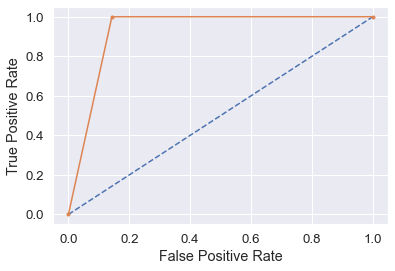

In [49]:
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for LGBM without cross validation: :\n")
LGBM(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Gaussian Naive Bayes without cross validation: :


Prediction Vector: 
 [0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 94.44444444444444
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.9235588972431078
F-Score OF Fraud Happening:
 0.918918918918919
Confusion Matrix: 
 [[20  1]
 [ 2 17]]


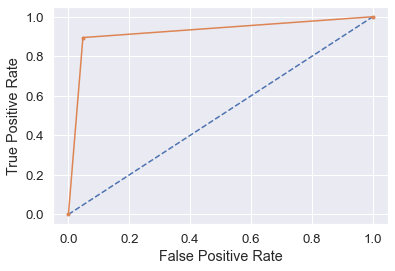

In [50]:
#X,y= XY_split(riskdf)
train_X, test_X, train_y, test_y=train_test(meddf,0.2,50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
#train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=5)
print ("\nResults for Gaussian Naive Bayes without cross validation: :\n")
GNB(train_X_imp, test_X_imp, train_y, test_y)

# MIFS results with manual split


Results for KNN without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


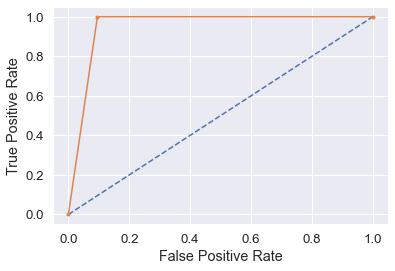

In [51]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for KNN without cross validation: :\n")
KNN(train_X, test_X, train_Y, test_Y)


Results for Naive Bayes without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 80.0
Precision of Fraud Happening: 
 73.91304347826086
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.8045112781954888
F-Score OF Fraud Happening:
 0.8095238095238095
Confusion Matrix: 
 [[15  6]
 [ 2 17]]


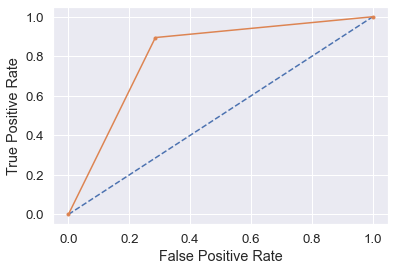

In [52]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for Naive Bayes without cross validation: :\n")
NB(train_X, test_X, train_Y, test_Y)


Results for Logistic Regression without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 90.0
Precision of Fraud Happening: 
 82.6086956521739
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9047619047619048
F-Score OF Fraud Happening:
 0.9047619047619047
Confusion Matrix: 
 [[17  4]
 [ 0 19]]


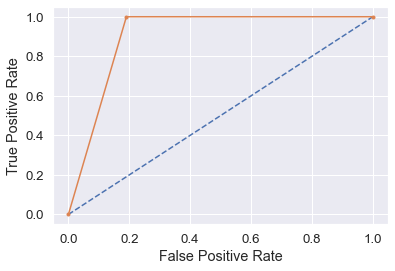

In [53]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2, random_state=50)

print ("\nResults for Logistic Regression without cross validation: :\n")
LogReg(train_X, test_X, train_Y, test_Y)



Results for MLP without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 77.5
Precision of Fraud Happening: 
 70.83333333333334
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.780701754385965
F-Score OF Fraud Happening:
 0.7906976744186046
Confusion Matrix: 
 [[14  7]
 [ 2 17]]


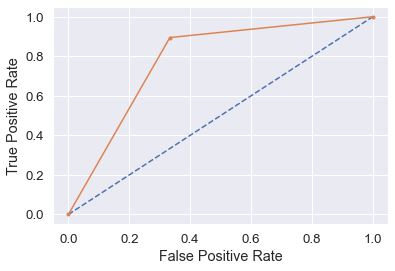

In [54]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2, random_state=50)

print ("\nResults for MLP without cross validation: :\n")
MLP(train_X, test_X, train_Y, test_Y)



Results for SVM without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 85.0
Precision of Fraud Happening: 
 76.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.8571428571428572
F-Score OF Fraud Happening:
 0.8636363636363636
Confusion Matrix: 
 [[15  6]
 [ 0 19]]


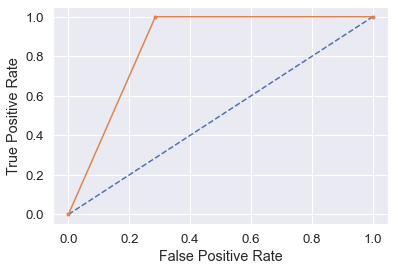

In [55]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for SVM without cross validation: :\n")
SVM(train_X, test_X, train_Y, test_Y)


Results for Decision Tree without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


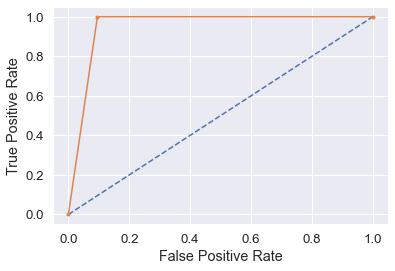

In [56]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for Decision Tree without cross validation: :\n")
DecTree(train_X, test_X, train_Y, test_Y)


Results for Random Forest without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 95.23809523809523
Recall of Fraud Happening: 
 90.9090909090909
AUC of Fraud Happening: 
 0.9267676767676767
F-Score OF Fraud Happening:
 0.9302325581395349
Confusion Matrix: 
 [[17  1]
 [ 2 20]]


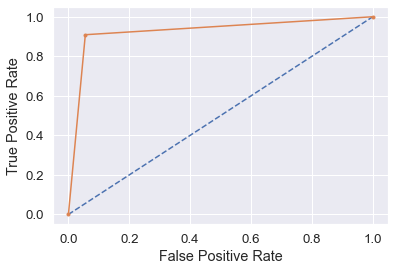

In [57]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=0)

print ("\nResults for Random Forest without cross validation: :\n")
RandomForest(train_X, test_X, train_Y, test_Y)


Results for AdaBoost without cross validation: :

[17:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Prediction Vector: 
 [1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 95.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9761904761904762
F-Score OF Fraud Happening:
 0.9743589743589743
Confusion Matrix: 
 [[20  1]
 [ 0 19]]


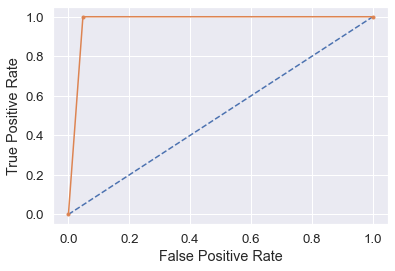

In [58]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for AdaBoost without cross validation: :\n")
XGBoost(train_X, test_X, train_Y, test_Y)


Results for AdaBoost without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


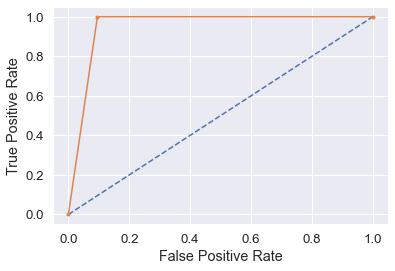

In [59]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for AdaBoost without cross validation: :\n")
AdaBoost(train_X, test_X, train_Y, test_Y)


Results for LGBM without cross validation: :


Prediction Vector: 
 [1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 86.36363636363636
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9285714285714286
F-Score OF Fraud Happening:
 0.9268292682926829
Confusion Matrix: 
 [[18  3]
 [ 0 19]]


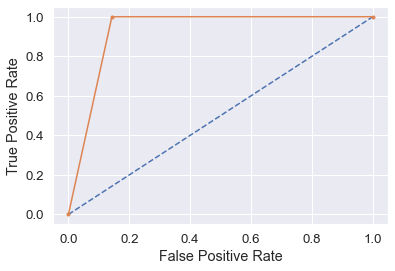

In [60]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for LGBM without cross validation: :\n")
LGBM(train_X, test_X, train_Y, test_Y)


Results for Guasian Naive Bayes without cross validation: :


Prediction Vector: 
 [0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 94.44444444444444
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.9235588972431078
F-Score OF Fraud Happening:
 0.918918918918919
Confusion Matrix: 
 [[20  1]
 [ 2 17]]


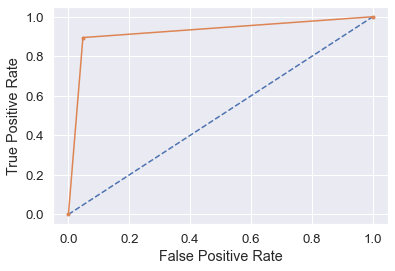

In [61]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
train_X_mutual= MIFS(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for Guasian Naive Bayes without cross validation: :\n")
GNB(train_X, test_X, train_Y, test_Y)

# Results of PCA with manual split


Results for KNN without cross validation: :


Prediction Vector: 
 [0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 90.0
Recall of Fraud Happening: 
 94.73684210526315
AUC of Fraud Happening: 
 0.9260651629072681
F-Score OF Fraud Happening:
 0.9230769230769231
Confusion Matrix: 
 [[19  2]
 [ 1 18]]


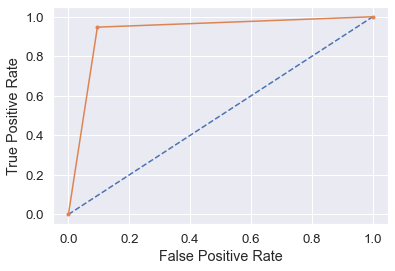

In [62]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for KNN without cross validation: :\n")
KNN(train_X, test_X, train_y, test_y)

###### train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=0)

print ("\nResults for Logistic Regression without cross validation: :\n")
NB(train_X, test_X, train_y, test_y)


Results for Logistic Regression without cross validation: :


Prediction Vector: 
 [0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 90.0
Precision of Fraud Happening: 
 89.47368421052632
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.899749373433584
F-Score OF Fraud Happening:
 0.8947368421052632
Confusion Matrix: 
 [[19  2]
 [ 2 17]]


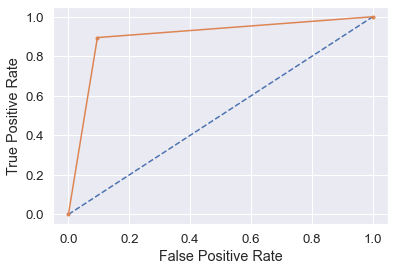

In [63]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for Logistic Regression without cross validation: :\n")
LogReg(train_X, test_X, train_y, test_y)


Results for MLP without cross validation: :



C:\Users\iuser\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Prediction Vector: 
 [0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 90.0
Recall of Fraud Happening: 
 94.73684210526315
AUC of Fraud Happening: 
 0.9260651629072681
F-Score OF Fraud Happening:
 0.9230769230769231
Confusion Matrix: 
 [[19  2]
 [ 1 18]]


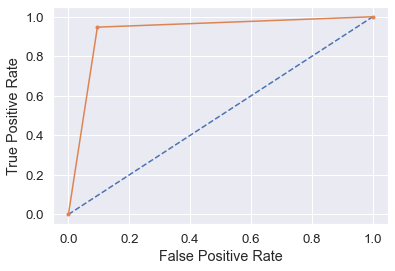

In [64]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for MLP without cross validation: :\n")
MLP(train_X, test_X, train_y, test_y)


Results for SVM without cross validation: :


Prediction Vector: 
 [0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 87.5
Precision of Fraud Happening: 
 85.0
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.8759398496240602
F-Score OF Fraud Happening:
 0.8717948717948718
Confusion Matrix: 
 [[18  3]
 [ 2 17]]


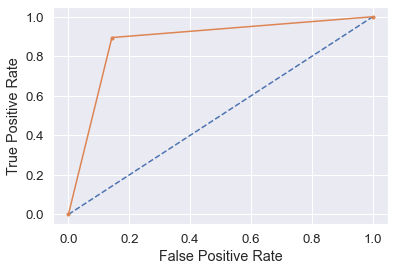

In [65]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for SVM without cross validation: :\n")
SVM(train_X, test_X, train_y, test_y)


Results for Decision Tree without cross validation: :


Prediction Vector: 
 [0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 90.0
Precision of Fraud Happening: 
 89.47368421052632
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.899749373433584
F-Score OF Fraud Happening:
 0.8947368421052632
Confusion Matrix: 
 [[19  2]
 [ 2 17]]


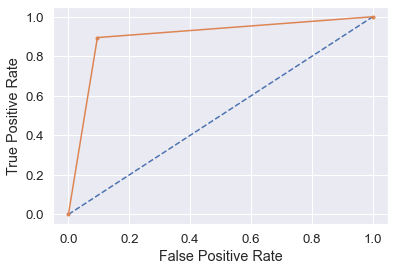

In [66]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for Decision Tree without cross validation: :\n")
DecTree(train_X, test_X, train_y, test_y)


Results for Random Forest without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 95.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9761904761904762
F-Score OF Fraud Happening:
 0.9743589743589743
Confusion Matrix: 
 [[20  1]
 [ 0 19]]


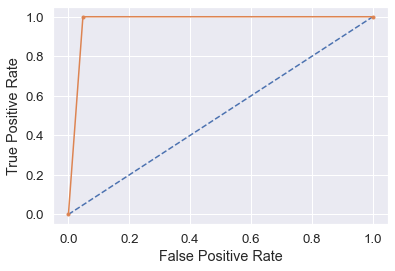

In [67]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for Random Forest without cross validation: :\n")
RandomForest(train_X, test_X, train_y, test_y)


Results for XGBoost without cross validation: :

[17:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Prediction Vector: 
 [1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 1 0]
Accuracy: 
 90.0
Precision of Fraud Happening: 
 85.71428571428571
Recall of Fraud Happening: 
 94.73684210526315
AUC of Fraud Happening: 
 0.9022556390977443
F-Score OF Fraud Happening:
 0.9
Confusion Matrix: 
 [[18  3]
 [ 1 18]]


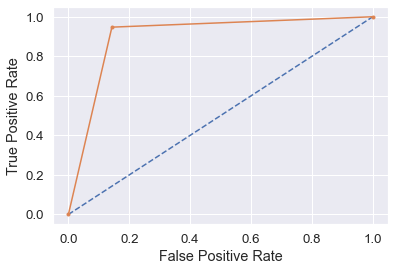

In [68]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for XGBoost without cross validation: :\n")
XGBoost(train_X, test_X, train_y, test_y)


Results for AdaBoost without cross validation: :


Prediction Vector: 
 [1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 0 1 0]
Accuracy: 
 85.0
Precision of Fraud Happening: 
 80.95238095238095
Recall of Fraud Happening: 
 89.47368421052632
AUC of Fraud Happening: 
 0.8521303258145364
F-Score OF Fraud Happening:
 0.8500000000000001
Confusion Matrix: 
 [[17  4]
 [ 2 17]]


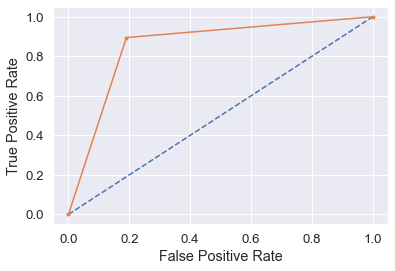

In [69]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for AdaBoost without cross validation: :\n")
AdaBoost(train_X, test_X, train_y, test_y)


Results for LGBM without cross validation: :


Prediction Vector: 
 [1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 95.0
Precision of Fraud Happening: 
 90.47619047619048
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9523809523809523
F-Score OF Fraud Happening:
 0.9500000000000001
Confusion Matrix: 
 [[19  2]
 [ 0 19]]


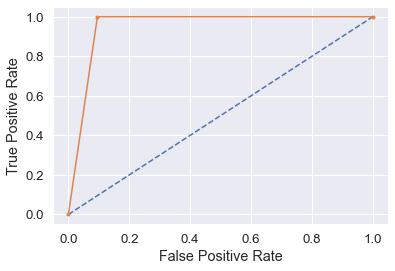

In [70]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for LGBM without cross validation: :\n")
LGBM(train_X, test_X, train_y, test_y)


Results for GNB without cross validation: :


Prediction Vector: 
 [0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 85.0
Precision of Fraud Happening: 
 93.33333333333333
Recall of Fraud Happening: 
 73.68421052631578
AUC of Fraud Happening: 
 0.844611528822055
F-Score OF Fraud Happening:
 0.8235294117647058
Confusion Matrix: 
 [[20  1]
 [ 5 14]]


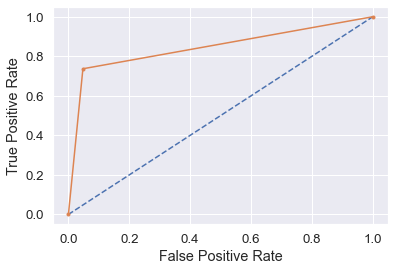

In [71]:
train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for GNB without cross validation: :\n")
GNB(train_X, test_X, train_y, test_y)

## RFE Results with Manual split

NB

Prediction Vector: 
 [1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 1 1 1]
Accuracy: 
 60.0
Precision of Fraud Happening: 
 60.0
Recall of Fraud Happening: 
 47.368421052631575
AUC of Fraud Happening: 
 0.593984962406015
F-Score OF Fraud Happening:
 0.5294117647058824
Confusion Matrix: 
 [[15  6]
 [10  9]]


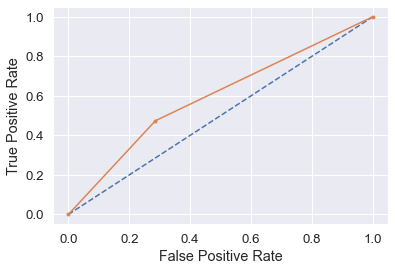

In [72]:
X, y = XY_split(meddf)
print("NB")
NBRFE(X,y,100, 50,0.2)

SVM

Prediction Vector: 
 [1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 85.0
Precision of Fraud Happening: 
 76.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.8571428571428572
F-Score OF Fraud Happening:
 0.8636363636363636
Confusion Matrix: 
 [[15  6]
 [ 0 19]]


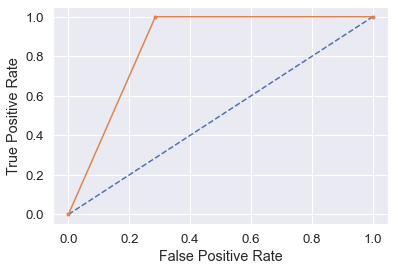

In [74]:
X, y = XY_split(meddf)
print("SVM")
SVMRFE(X,y,50,0.2)

DT

Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 92.5
Precision of Fraud Happening: 
 90.0
Recall of Fraud Happening: 
 94.73684210526315
AUC of Fraud Happening: 
 0.9260651629072681
F-Score OF Fraud Happening:
 0.9230769230769231
Confusion Matrix: 
 [[19  2]
 [ 1 18]]


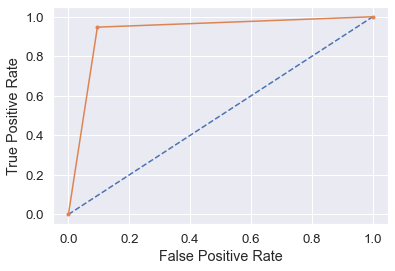

In [75]:
X, y = XY_split(meddf)
print("DT")
DTRFE(X,y, 50,0.2)

Random Forest

Prediction Vector: 
 [1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 95.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9761904761904762
F-Score OF Fraud Happening:
 0.9743589743589743
Confusion Matrix: 
 [[20  1]
 [ 0 19]]


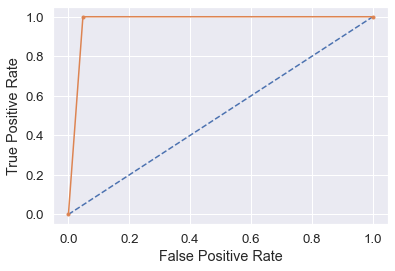

In [76]:
X, y = XY_split(meddf)
print("Random Forest")
RFRFE(X,y,100, 50,0.2)

XGboost
[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Prediction Vector: 
 [1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1

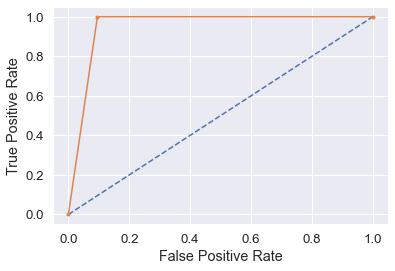

In [77]:
X, y = XY_split(meddf)
print("XGboost")
XGBoostRFE(X,y,100, 50,0.2)

Adaboost

Prediction Vector: 
 [1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 95.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9761904761904762
F-Score OF Fraud Happening:
 0.9743589743589743
Confusion Matrix: 
 [[20  1]
 [ 0 19]]


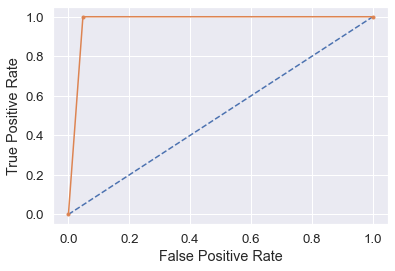

In [78]:
X, y = XY_split(meddf)
print("Adaboost")
AdaBoostRFE(X,y,100, 50,0.2)

LOGISTIC REGRESSION

Prediction Vector: 
 [1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 95.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 0.9761904761904762
F-Score OF Fraud Happening:
 0.9743589743589743
Confusion Matrix: 
 [[20  1]
 [ 0 19]]


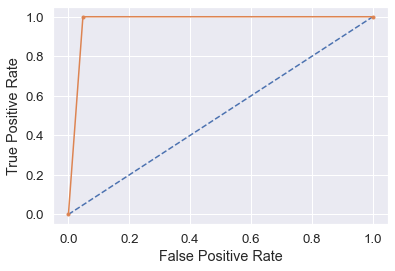

In [79]:
X, y = XY_split(meddf)
print("LOGISTIC REGRESSION")
LGBMRFE(X,y, 100,50,0.2)

# PARAMETER TUNING

## Selected RandomForest for Parameter Tuning

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [81]:
def RandomForest_ParameterTuning(trainX, testX, trainY, testY):
    clf  = RandomForestClassifier()
    r = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                                   n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    r.fit(trainX,trainY)
    validationmetrics(r,testX,testY)
    #base_accuracy = evaluate(r,testX,testY)
    pprint (r.best_params_)
    

RandomForestClassifier(random_state=9)

Results for Randon Forest without cross validation: :

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.1s finished



Prediction Vector: 
 [0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 1]
Accuracy: 
 97.5
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 94.73684210526315
AUC of Fraud Happening: 
 0.9736842105263157
F-Score OF Fraud Happening:
 0.972972972972973
Confusion Matrix: 
 [[21  0]
 [ 1 18]]


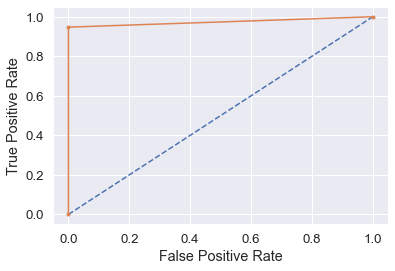

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1200}


In [82]:
def initial_result(meddf):
    X,y= XY_split(meddf)
    train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=34)
    train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
    print ("\nResults for Randon Forest without cross validation: :\n")
    RandomForest_ParameterTuning(train_X_imp, test_X_imp, train_y, test_y)
    
    
initial_result(meddf)    

# Conclusion & Analysis

### Random Forest with PCA and Dec Tree and Random forest with MIFS performked exceptionally well. Naive bayes underperformed. Overall traditional ML algorithms still worked better and faster than Bayesian model